In [117]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import graphviz

In [118]:
df=pd.read_csv('data.csv')

In [119]:
df.describe()

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.004700,51.072400,1092.760000,3.508085,0.000000,45.000000,337.362954
std,3.851903,3.390699,740.292278,1.613040,28.737185,28.737185,60.023406
min,27.218000,46.235000,-12.200000,1.796619,-45.000000,0.000000,164.014553
25%,29.539000,48.417000,20.700000,2.335595,-25.000000,20.000000,293.097438
50%,32.524000,50.838500,1368.700000,3.050507,0.000000,45.000000,343.597690
75%,37.325000,52.589000,1545.900000,4.151495,25.000000,70.000000,385.784373
max,38.317000,56.951000,2049.200000,6.859957,45.000000,90.000000,446.683693


In [120]:
del df['img']

In [121]:
df

,Location,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear
0,Ardabil,38.317,48.417,1332.0,6.031665,-45,0,267.981217
1,Ardabil,38.317,48.417,1332.0,6.031665,-35,0,289.396595
2,Ardabil,38.317,48.417,1332.0,6.031665,-25,0,309.203211
3,Ardabil,38.317,48.417,1332.0,6.031665,-15,0,324.975573
4,Ardabil,38.317,48.417,1332.0,6.031665,-5,0,334.305725
...,...,...,...,...,...,...,...,...
995,Kerman,30.274,56.951,1748.3,2.498567,-5,90,260.118802
996,Kerman,30.274,56.951,1748.3,2.498567,5,90,258.581072
997,Kerman,30.274,56.951,1748.3,2.498567,15,90,258.087367
998,Kerman,30.274,56.951,1748.3,2.498567,25,90,254.746498


In [122]:
#conditions=[
#    (df['ACenergyPerYear']<293),
#    (df[293<'ACenergyPerYear']<343),
#    (df[343<'ACenergyPerYear']<385),
#    (df[385<'ACenergyPerYear']),]
#values=[0,1,2,3]
#df['goodness']=np.select(df['ACenergy)

In [123]:
df['goodness']=np.where(df['ACenergyPerYear']>337,True,False)

In [124]:
df

,Location,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear,goodness
0,Ardabil,38.317,48.417,1332.0,6.031665,-45,0,267.981217,False
1,Ardabil,38.317,48.417,1332.0,6.031665,-35,0,289.396595,False
2,Ardabil,38.317,48.417,1332.0,6.031665,-25,0,309.203211,False
3,Ardabil,38.317,48.417,1332.0,6.031665,-15,0,324.975573,False
4,Ardabil,38.317,48.417,1332.0,6.031665,-5,0,334.305725,False
...,...,...,...,...,...,...,...,...,...
995,Kerman,30.274,56.951,1748.3,2.498567,-5,90,260.118802,False
996,Kerman,30.274,56.951,1748.3,2.498567,5,90,258.581072,False
997,Kerman,30.274,56.951,1748.3,2.498567,15,90,258.087367,False
998,Kerman,30.274,56.951,1748.3,2.498567,25,90,254.746498,False


In [125]:
#df=df.loc[df['goodness']==True]

In [126]:
d={True:1,False:0}
df['goodness']=df['goodness'].map(d)

In [127]:
df

,Location,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear,goodness
0,Ardabil,38.317,48.417,1332.0,6.031665,-45,0,267.981217,0
1,Ardabil,38.317,48.417,1332.0,6.031665,-35,0,289.396595,0
2,Ardabil,38.317,48.417,1332.0,6.031665,-25,0,309.203211,0
3,Ardabil,38.317,48.417,1332.0,6.031665,-15,0,324.975573,0
4,Ardabil,38.317,48.417,1332.0,6.031665,-5,0,334.305725,0
...,...,...,...,...,...,...,...,...,...
995,Kerman,30.274,56.951,1748.3,2.498567,-5,90,260.118802,0
996,Kerman,30.274,56.951,1748.3,2.498567,5,90,258.581072,0
997,Kerman,30.274,56.951,1748.3,2.498567,15,90,258.087367,0
998,Kerman,30.274,56.951,1748.3,2.498567,25,90,254.746498,0


In [128]:
features=np.array(df.drop(['Location','ACenergyPerYear','goodness'],1))
labels=np.array(df['goodness'])

In [138]:
fea=['Latitude','Longitude','Elevation','skycover','Orientaion','Tilt']
X=features
y=labels

In [130]:
#dt:desicion tree
dt=DecisionTreeClassifier()

In [131]:
dt=dt.fit(X,y)

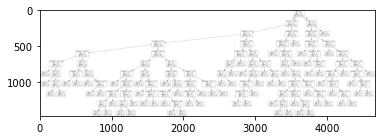

In [144]:
data = tree.export_graphviz(dt,out_file=None,feature_names=fea)
graph=pydotplus.graph_from_dot_data(data)
graph.write_png('mydesiciontree.png')

img=pltimg.imread('mydesiciontree.png')
imgplot=plt.imshow(img)
plt.savefig('mydesiciontree1.jpg',dpi=2000)
plt.show()